Pandas is a python library built on top of Numpy and it significantly adopts from Numpy’s array based computing model. <br> While Numpy is best suited for working
with homogeneous array based numerical data, Pandas is designed for working with
heterogeneous tabular data. It allows one to perform powerful tabular data based operations similar to those used in Database frameworks and spreadsheet programs. <br>

There are three fundamental objects in pandas, they are:<br>
A Series is a one dimensional data container object containing a sequence of homogeneous values. The Series object is similar to a one dimensional array except that the sequence of values contained within a Series object is associated with an explicitly defined index. This is
different from Numpy’s array object which has an implicitly defined index, which we used to access the values within it. This explicit index definition gives the Series object additional data types used to represent the index values. <br>
The Series index can be composed of values of any data types, including strings. Thus the values within a Series object can be accessed via the labels (generally strings) within its explicitly defined index or via its implicitly defined array integer index.<br>

1. The Series Object<br>
2. The Dataframe Object<br>
3. The Index object<br>

In [1]:
import numpy as np
import pandas as pd

In [2]:
lst = np.random.randint(10,50,5)
s = pd.Series(lst)
s

0    25
1    13
2    21
3    22
4    25
dtype: int64

In [3]:
s.values, s.index

(array([25, 13, 21, 22, 25]), RangeIndex(start=0, stop=5, step=1))

In [4]:
lst = np.random.randint(10,50,5)
t = pd.Series(lst,index =['a','b','c','d','e'])
t

a    20
b    38
c    49
d    48
e    10
dtype: int64

In [5]:
t.values, t.index

(array([20, 38, 49, 48, 10]), Index(['a', 'b', 'c', 'd', 'e'], dtype='object'))

In [6]:
# Indexing
s, s[1:-1]

(0    25
 1    13
 2    21
 3    22
 4    25
 dtype: int64,
 1    13
 2    21
 3    22
 dtype: int64)

In [7]:
t, t['b':'e'] # here end is inclusive

(a    20
 b    38
 c    49
 d    48
 e    10
 dtype: int64,
 b    38
 c    49
 d    48
 e    10
 dtype: int64)

In [8]:
k = [1, 2, 3, 4, 5]
v = ['z', 'x', 'c', 'v', 'b']

d = {key:val for key,val in zip(v,k)}

d_ = pd.Series(d)
d_

z    1
x    2
c    3
v    4
b    5
dtype: int64

In [9]:
d_['z':'v']

z    1
x    2
c    3
v    4
dtype: int64

In [10]:
d_.max(), d_.min(), d_.mean(), d_.var(), d_.std(), d_.sum(), d_.cumsum(), d_.prod(), d_.cumprod()

(5,
 1,
 3.0,
 2.5,
 1.5811388300841898,
 15,
 z     1
 x     3
 c     6
 v    10
 b    15
 dtype: int64,
 120,
 z      1
 x      2
 c      6
 v     24
 b    120
 dtype: int64)

In [11]:
d_.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

### DataFrame Object

In [12]:
# row wise data
d =  dict(
    sid=[1,'a'],
    vicky = [2,'b']
)
d

{'sid': [1, 'a'], 'vicky': [2, 'b']}

In [13]:
# column wise data
d1 =  dict(
    age=[1,2],
    code = ['a','b']
)
d1

{'age': [1, 2], 'code': ['a', 'b']}

The dictionary shown above, the values within the container objects that correspond to its keys are heterogeneous with respect to each other (integers, floats and strings). But the values corresponding to each feature are homogeneous by themselves (ex: all age are integers).

In [14]:
#implicit numpy index keys
s1 = pd.DataFrame(d1)
s1

,age,code
0,1,a
1,2,b


Each row in the DataFrame is a Series object which shares its index with all other rows and each column is also a Series object which shares its index with all other columns. The values within the DataFrame shown above can be expressed and used as a two dimensional numpy array because each of these Series objects can be converted to their corresponding one
dimensional array representations via its “values” attribute.  All numpy array attributes, functions and methods are applicable to the DataFrame as a whole and to its individual rows or columns.
DataFrame objects can be created using a dictionary as shown below. Note that Pandas creates a default index that explicitly expresses numpy’s implicit integer indexes, when no index
is specified during its instantiation.

In [15]:
s1 = pd.DataFrame(d1,index=d.keys())
s1

,age,code
sid,1,a
vicky,2,b


In [16]:
a = np.random.randint(1,50,(5,4))
a = a.astype(np.float32)
a

array([[34., 11., 15., 14.],
       [19., 30., 12., 40.],
       [17., 49., 43., 41.],
       [43.,  5., 38., 17.],
       [32.,  1., 23., 37.]], dtype=float32)

### Index Object

Both Series and DataFrame objects have explicit indexes which one could use to access and slice the data contained within them. These indexes are data objects in their own right. One could consider them as immutable arrays or set-like data containers on which set operations can be performed. One could create an index object as shown below.<br>
This immutability of index objects makes it possible to share indexes between multiple DataFrames without the danger of accidentally modifying them (the indexes) while performing operations over these dataframes.

In [17]:
indices1 = pd.Index([1,2,3,4,5])
indices1

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [18]:
indices2 = pd.Index([10,20,3,40,50])
indices2

Int64Index([10, 20, 3, 40, 50], dtype='int64')

In [19]:
# indices2[2] = 100 TypeError: Index does not support mutable operations

Set operations can be performed using index objects as shown below. This allows for choosing values across datasets based on set operation performed on their index objects. Set operations on index objects are demonstrated in the code shown below

In [20]:
indices1 & indices2

<ipython-input-20-d8d147dd7cd0>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indices1 & indices2


Int64Index([3], dtype='int64')

In [21]:
indices1 | indices2

<ipython-input-21-7490b5f91c21>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indices1 | indices2


Int64Index([1, 2, 3, 4, 5, 10, 20, 40, 50], dtype='int64')

In [22]:
indices1 ^ indices2

<ipython-input-22-856fe2c27590>:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indices1 ^ indices2


Int64Index([1, 2, 4, 5, 10, 20, 40, 50], dtype='int64')

### Reading and Writing Data

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# data = pd.read_table('sample.tsv')

In [25]:
# data = pd.read_excel('sample.xlsx')

In [26]:
# data = pd.read_excel('sample.html')

In [27]:
# data = pd.read_excel('sample.json')

In [28]:
# data = pd.read_excel('sample.hdf5')

In [29]:
! wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

--2023-08-28 00:09:04--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv.8’

iris.csv.8          100%[===================>]   3.77K  --.-KB/s    in 0s      

2023-08-28 00:09:05 (42.4 MB/s) - ‘iris.csv.8’ saved [3858/3858]



CSV files can be read into the current ”working space”, as a DataFrame object using the read_csv function as shown below. The index_col keyword argument allows one to specify which column in the csv file represents the index.<br>
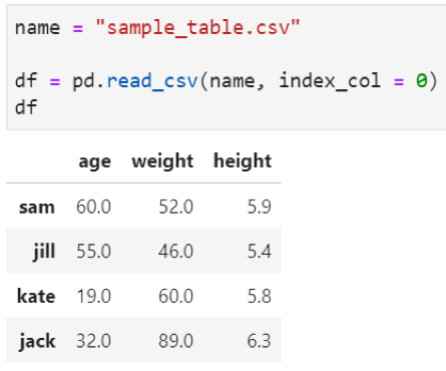

In [30]:
data.shape

(150, 5)

In [31]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [33]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [35]:
data.head(-5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica


In [36]:
data.head(145)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica


In [37]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,virginica
90,5.5,2.6,4.4,1.2,versicolor
76,6.8,2.8,4.8,1.4,versicolor
40,5.0,3.5,1.3,0.3,setosa
87,6.3,2.3,4.4,1.3,versicolor


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pandas converts each column name of the tabular data it represents, as attributes of the DataFrame object and hence column values of a DataFrame can be accessed by using the dot operator followed by the column’s name. This is demonstrated in the code shown below.
Note that this method returns the columns in the form of a Series object instead of an array. The numpy array underlying these Series objects can be accessed using the values method if required.

In [40]:
data.sepal_length, data.sepal_length.values

(0      5.1
 1      4.9
 2      4.7
 3      4.6
 4      5.0
       ... 
 145    6.7
 146    6.3
 147    6.5
 148    6.2
 149    5.9
 Name: sepal_length, Length: 150, dtype: float64,
 array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.

In [41]:
data['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [42]:
data.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [43]:
data.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,setosa


The value_counts method returns a Series object, whose index represents the unique values of the column and whose values represent the occurrence counts of the values represented by the index. Note that the Series object is returned sorted in descending order.

In [44]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [45]:
type(data.species.value_counts())

pandas.core.series.Series

In [46]:
data.sepal_width.value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

### Plot

<Axes: >

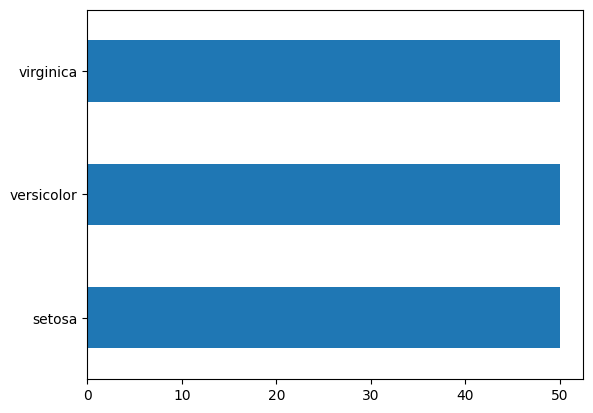

In [47]:
data.species.value_counts().plot(kind='barh') # for vertical plot use 'bar'

Shown above is a bar plot, which gives us a clear visual representation of the number of cars belonging to the various automobile manufactures used in the data set. If one prefers a horizontal version of the same bar plot, the barh keyword argument should be used instead of
bar. <br>
Pandas uses the Matplotlib library to create these plots via methods defined within the Series/DataFrame classes. The Matplotlib library is an extensive python plotting library, which we will be discussing further on in the book under the chapter “The Matplotlib Library”.
Some of the relevant plot types available to be used with pandas, apart from the bar pot described above are: Line plots, histograms, Kernel density estimation (kde) plots, and  scatter
plots.

<Axes: ylabel='Frequency'>

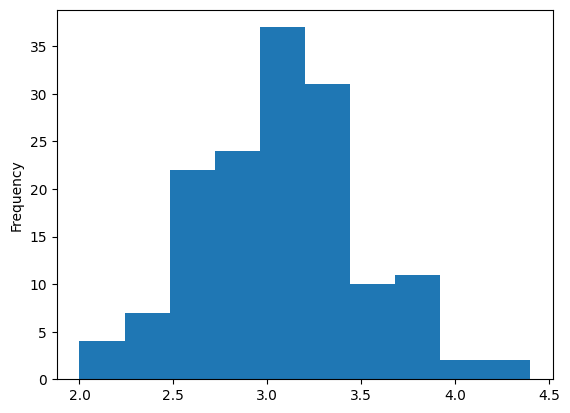

In [48]:
data.sepal_width.plot(kind='hist')

Scatter plots are used when one wants to understand the relationship between values in two chosen columns of the DataFrame.

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

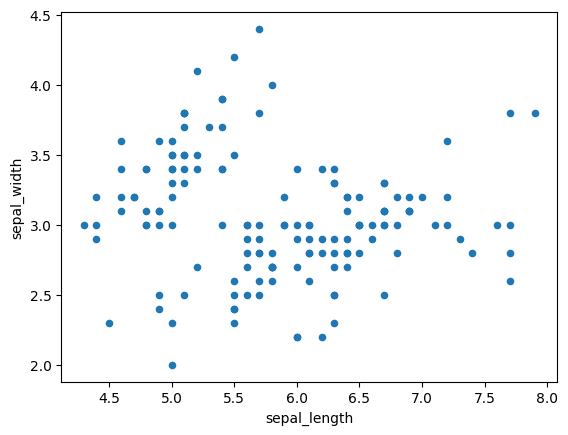

In [49]:
data.plot(x='sepal_length',y='sepal_width',kind='scatter')

<Axes: xlabel='petal_length', ylabel='petal_width'>

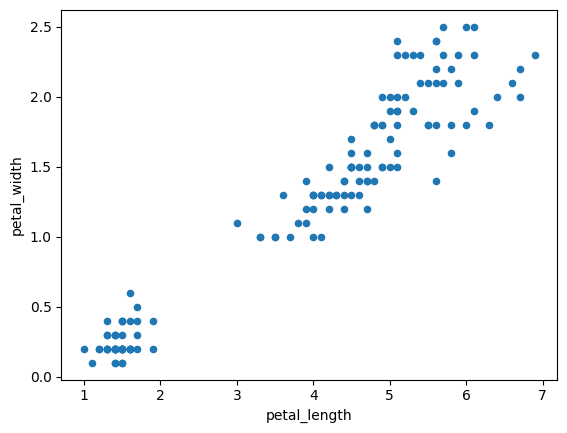

In [50]:
data.plot(x='petal_length',y='petal_width',kind='scatter')

### Drop

The Drop method removes rows or columns from a DataFrame by specifying label names and corresponding axis of the rows/columns to be dropped as shown below. Note that we have also used the head method to limit the returned output to just the first five rows.

In [51]:
data.drop(['sepal_width'],axis=1).head(5) # axis 1 denotes column

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa
3,4.6,1.5,0.2,setosa
4,5.0,1.4,0.2,setosa


The drop method does not actually drop the rows/columns specified, but actually returns a “view” of the DataFrame with desired rows/columns dropped. If one desires to permanently drop columns/rows from a DataFrame, the inplace keyword argument should be changed from its default value of False to True.

In [52]:
data.drop([4,5],axis=0).head(5) # axis 0 denotes row

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa


### sort_values
The sort_values method allows one to sort a DataFrame based on the values of any one of its numerical columns. Shown in the code below, we sort the dataset based on the “price” column.

In [53]:
data.sort_values('sepal_length',ascending=False).head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


The False boolean value assigned to the ascending keyword argument as shown above, sorts the dataframe in descending order. This keyword argument by default is assigned the True boolean value and thus the sort_values method sorts the DataFrame in ascending order of the column specified.

### Assign
The assign method is used to create a new DataFrame containing the same values as the original DataFrame to which it was applied to, but with new columns assigned to it. This is demonstrated in the code below. Note that the new column is added as last column in the new
DataFrame.

In [54]:
tmp = data.sepal_width
data.drop('sepal_width',axis=1,inplace=True)
df = data.assign(sepal_w = tmp)
df

,sepal_length,petal_length,petal_width,species,sepal_w
0,5.1,1.4,0.2,setosa,3.5
1,4.9,1.4,0.2,setosa,3.0
2,4.7,1.3,0.2,setosa,3.2
3,4.6,1.5,0.2,setosa,3.1
4,5.0,1.4,0.2,setosa,3.6
...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0
146,6.3,5.0,1.9,virginica,2.5
147,6.5,5.2,2.0,virginica,3.0
148,6.2,5.4,2.3,virginica,3.4


In [55]:
tmp = tmp/tmp.mean()
df['col_avgd_sepal_width'] = tmp
df

,sepal_length,petal_length,petal_width,species,sepal_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497
...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080


In [56]:
df.shape

(150, 6)

In [57]:
df.insert(loc=df.shape[1]-1,column='repositioned_avg_sample_w',value=df.col_avgd_sepal_width) # this does inplace operation
df

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


### Groupby
The Groupby method is used for aggregating the numerical columns of a DataFrame with respect to some other column containing categorical values. Consider the Data Frame
df. Suppose one wants to do a mean aggregate on the numerical values of the
DataFrame with respect to the sepal_length column, this can be done as shown below.

In [58]:
tmp = df.groupby('species').mean()
tmp

,sepal_length,petal_length,petal_width,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
species,,,,,,
setosa,5.006,1.462,0.246,3.428,1.121239,1.121239
versicolor,5.936,4.260,1.326,2.770,0.906018,0.906018
virginica,6.588,5.552,2.026,2.974,0.972743,0.972743


In [59]:
df.groupby('sepal_length').mean()

<ipython-input-59-fe6fcfc4b9c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sepal_length').mean()


,petal_length,petal_width,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
sepal_length,,,,,
4.3,1.100000,0.100000,3.000000,0.981247,0.981247
4.4,1.333333,0.200000,3.033333,0.992150,0.992150
4.5,1.300000,0.300000,2.300000,0.752290,0.752290
4.6,1.325000,0.225000,3.325000,1.087549,1.087549
4.7,1.450000,0.200000,3.200000,1.046664,1.046664
4.8,1.580000,0.200000,3.180000,1.040122,1.040122
4.9,2.266667,0.550000,2.950000,0.964893,0.964893
5.0,1.840000,0.430000,3.120000,1.020497,1.020497
5.1,1.722222,0.400000,3.477778,1.137520,1.137520


The groupby object does not display any values. This is demonstrated in the code shown
below. It relies on a second aggregation method like count, sum, mean, std, var, min or max to
be applied after it to return any result.<br>
When any of the aggregation methods mentioned above is applied to a groupby object,
pandas internally applies that method individually to each of the DataFrames contained within
it, thus resulting in one row per DataFrame that contains the aggregates of each column. Each
of these resulting rows is then collected within another DataFrame and then returned.

Note that the indexes of the DataFrames returned by a groupby operation have names. The
name of such indexes can be accessed using the name attribute of index objects. This
demonstrated as shown below.

In [60]:
tmp.index.name

'species'

Dataframes with no index names (actually index names are by default assigned the None
value) can be named and DataFrames with already existing index names can be renamed, by
directly assigning the desired name to the name attribute of the index object. This is
demonstrated in the code below.

In [61]:
tmp.index.name = 'species_type'

In [62]:
tmp.index.name

'species_type'

### Missing Data

In [63]:
np.nan, type(np.nan)

(nan, float)

In [64]:
np.nan*1000 # any operation with nan results into a nan

nan

In [65]:
lst = np.array([1,2,3,np.nan])
np.sum(lst)

nan

Pandas relies on Numpy’s nan value to handle and perform operations on missing data.
Pandas also accepts python’s None values, but it internally converts them to numpy’s nan
values. Pandas represents nan as NaN within its container objects.  This is demonstrated in the
code shown below.

In [66]:
s = pd.Series([1,2,3,np.nan,4,5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [67]:
type(s[3])

numpy.float64

Pandas while dealing with NaN values excludes them
during any aggregation operation. This makes it easier to statistically inspect data even in the
presence of missing values. This is demonstrated in the code shown below.

In [68]:
s.describe()

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

In [69]:
s.mean(), s.std(), s.cumsum(), s.cumprod()

(3.0,
 1.5811388300841898,
 0     1.0
 1     3.0
 2     6.0
 3     NaN
 4    10.0
 5    15.0
 dtype: float64,
 0      1.0
 1      2.0
 2      6.0
 3      NaN
 4     24.0
 5    120.0
 dtype: float64)

It was because of this implementation within Pandas, that we were able to explore and perform statistical aggregations on the DataFrame df, which contained missing values.

### Isna, notna, dropna and fillna
Isna, notna, dropna and fillna are Pandas methods pandas used for handling missing values.
The isna and notna methods are used for detecting missing values as shown below.

In [70]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [71]:
s.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

In [72]:
s.notna()

0     True
1     True
2     True
3    False
4     True
5     True
dtype: bool

In [73]:
np.where(s.notna())

(array([0, 1, 2, 4, 5]),)

In [74]:
np.where(s.isna())

(array([3]),)

The isna method when applied to DataFrames returns another DataFrame with the same index
and size, but filled with boolean values instead. All True values within this returned DataFrame
represent cells in the original Dataframe where values are missing. This is demonstrated in the
code shown below.

In [75]:
df.isna()

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False


To find out which columns contain missing values we can apply the sum method across the
axis = 0 as shown below (this works because True == 1 and False == 0).

In [76]:
df.isna().sum() # at df level

sepal_length                 0
petal_length                 0
petal_width                  0
species                      0
sepal_w                      0
repositioned_avg_sample_w    0
col_avgd_sepal_width         0
dtype: int64

In [77]:
df.sepal_length.isna().sum() # at col level

0

In [78]:
df.isna().sum(axis=0) # at row level

sepal_length                 0
petal_length                 0
petal_width                  0
species                      0
sepal_w                      0
repositioned_avg_sample_w    0
col_avgd_sepal_width         0
dtype: int64

In [79]:
df.isna().sum(axis=1) # at col level

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

The dropna method is used for dropping rows or columns in a DataFrame that contain missing
values. This is demonstrated in the code shown below. The code on the right drops rows con-
taining missing values and the code on the right drops columns.

Note that the dropna method does not actually change the original DataFrame but actually
returns a “view” of the original DataFrame, with the desired rows/columns dropped. To actually
drop the columns/rows from the original DataFrame one has to change the inplace keyword
argument to True.

In [80]:
df.dropna() # default axis is 0 (row)

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


In [81]:
df.dropna(axis=1)

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


The fillna method is used to fill missing values in Series and DataFrames with values of our
choice. This is demonstrated for Series objects in the code shown below.

In the case of DataFrames, the fillna method can be used as shown below.

In [82]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [83]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    4.0
5    5.0
dtype: float64

In [84]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [85]:
df

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


In [86]:
df.fillna(0)

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


In [87]:
df.fillna(df.mean())

<ipython-input-87-a2478f315f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


In the case that one wants to specify separate “fill” values for each column, it can be done
using a dictionary which specifies the fill values for each of the columns containing missing
values. This is demonstrated in the code shown below.<br>
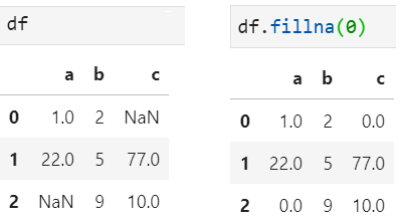
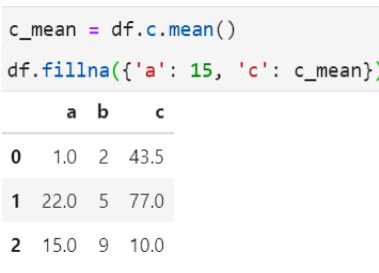

### Data Selection and Slicing
Pandas main provides the iloc and loc indexer attributes for data selection and slicing.  The
iloc indexer attribute allows one to use the underlying implicit numpy indexes for data selec-
tion/slicing. This is demonstrated in the code shown below.

In [88]:
df

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
...,...,...,...,...,...,...,...
145,6.7,5.2,2.3,virginica,3.0,0.981247,0.981247
146,6.3,5.0,1.9,virginica,2.5,0.817706,0.817706
147,6.5,5.2,2.0,virginica,3.0,0.981247,0.981247
148,6.2,5.4,2.3,virginica,3.4,1.112080,1.112080


In [89]:
df.iloc[10:15,3:5] # for col indices we can use 0 based indexing and end is non-inclusive

,species,sepal_w
10,setosa,3.7
11,setosa,3.4
12,setosa,3.0
13,setosa,3.0
14,setosa,4.0


The loc indexer attribute allows one to use the DataFrame’s explicitly labeled indexes for data
selection/slicing. This is demonstrated in the code shown below.

In [90]:
df.loc[10:15,'species':'repositioned_avg_sample_w']

,species,sepal_w,repositioned_avg_sample_w
10,setosa,3.7,1.210205
11,setosa,3.4,1.112080
12,setosa,3.0,0.981247
13,setosa,3.0,0.981247
14,setosa,4.0,1.308330
15,setosa,4.4,1.439163


### Conditional Slicing
DataFrames can be conditionally sliced based on values contained in its columns as shown
below.

In [91]:
condition = df.species == 'setosa'
df[condition]

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
5,5.4,1.7,0.4,setosa,3.9,1.275621,1.275621
6,4.6,1.4,0.3,setosa,3.4,1.112080,1.112080
7,5.0,1.5,0.2,setosa,3.4,1.112080,1.112080
8,4.4,1.4,0.2,setosa,2.9,0.948539,0.948539
9,4.9,1.5,0.1,setosa,3.1,1.013956,1.013956


In [92]:
df[df.sepal_length == 5.1]

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
17,5.1,1.4,0.3,setosa,3.5,1.144788,1.144788
19,5.1,1.5,0.3,setosa,3.8,1.242913,1.242913
21,5.1,1.5,0.4,setosa,3.7,1.210205,1.210205
23,5.1,1.7,0.5,setosa,3.3,1.079372,1.079372
39,5.1,1.5,0.2,setosa,3.4,1.112080,1.112080
44,5.1,1.9,0.4,setosa,3.8,1.242913,1.242913
46,5.1,1.6,0.2,setosa,3.8,1.242913,1.242913
98,5.1,3.0,1.1,versicolor,2.5,0.817706,0.817706


In [93]:
cond1 = df.sepal_length >= 5.1
cond2 = df.species == 'setosa'
df[cond1 & cond2]

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
0,5.1,1.4,0.2,setosa,3.5,1.144788,1.144788
5,5.4,1.7,0.4,setosa,3.9,1.275621,1.275621
10,5.4,1.5,0.2,setosa,3.7,1.210205,1.210205
14,5.8,1.2,0.2,setosa,4.0,1.308330,1.308330
15,5.7,1.5,0.4,setosa,4.4,1.439163,1.439163
16,5.4,1.3,0.4,setosa,3.9,1.275621,1.275621
17,5.1,1.4,0.3,setosa,3.5,1.144788,1.144788
18,5.7,1.7,0.3,setosa,3.8,1.242913,1.242913
19,5.1,1.5,0.3,setosa,3.8,1.242913,1.242913
20,5.4,1.7,0.2,setosa,3.4,1.112080,1.112080


In [94]:
cond1 = df.sepal_length == 5.1
cond2 = df.species == 'setosa'
df[~cond1 & cond2]

,sepal_length,petal_length,petal_width,species,sepal_w,repositioned_avg_sample_w,col_avgd_sepal_width
1,4.9,1.4,0.2,setosa,3.0,0.981247,0.981247
2,4.7,1.3,0.2,setosa,3.2,1.046664,1.046664
3,4.6,1.5,0.2,setosa,3.1,1.013956,1.013956
4,5.0,1.4,0.2,setosa,3.6,1.177497,1.177497
5,5.4,1.7,0.4,setosa,3.9,1.275621,1.275621
6,4.6,1.4,0.3,setosa,3.4,1.112080,1.112080
7,5.0,1.5,0.2,setosa,3.4,1.112080,1.112080
8,4.4,1.4,0.2,setosa,2.9,0.948539,0.948539
9,4.9,1.5,0.1,setosa,3.1,1.013956,1.013956
10,5.4,1.5,0.2,setosa,3.7,1.210205,1.210205


## Combining Data
Sometimes it is required to unify/combine two DataFrames containing different information
about some common set of objects, so as to better understand the data.
Inner joins:
Inner joins basically lets one combine rows that share data. It basically requires that the two
DataFrames share a column that describe the same feature about the data. This common column (generally the index) is referred to as ‘key’. Given a key, an inner join will only consider
those rows that are common to both the DataFrames (intersection of the keys values of both
datasets) and combine them together in one DataFrame.
<br>
Outer joins:
Outer joins basically lets one combine rows of two DataFrames based on:
1. All the rows in any one of the DataFrames (left and right outer joins)
2. The union of the rows of both DataFrames (Outer join)
<br>
It does not require that the two DataFrames have common rows. Outer joins combine
DataFrames based on the specifications defined in points 1 and 2 described above. It fills cells
of rows that are not common to both with NaN values.
The set diagram shown below expresses the concept of joins further.
<br>

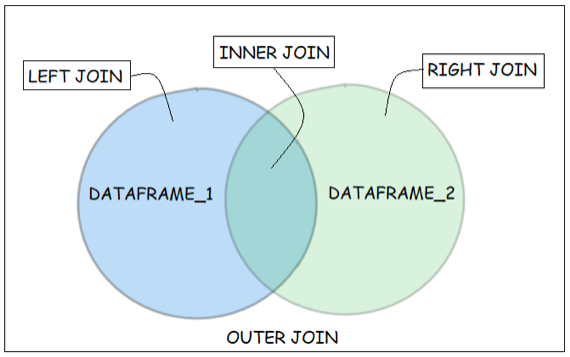

In [95]:
df1 = pd.DataFrame({
    'F1':[0,1,2,3,4,5],
    'F2':[11,22,33,44,55,66]
    }, index = ['A','B','C','D','E','F']
)
df1

,F1,F2
A,0,11
B,1,22
C,2,33
D,3,44
E,4,55
F,5,66


In [96]:
df2 = pd.DataFrame({
    'F3':[0,1,2,3],
    'F4':[111,222,333,444]
    }, index = ['A','B','Y','Z']
)
df2

,F3,F4
A,0,111
B,1,222
Y,2,333
Z,3,444


### Inner Join

In [97]:
df3 = pd.merge(df1,df2,left_index=True,right_index=True)
df3

,F1,F2,F3,F4
A,0,11,0,111
B,1,22,1,222


### Left Join

In [98]:
df4 = df1.join(df2)
df4

,F1,F2,F3,F4
A,0,11,0.0,111.0
B,1,22,1.0,222.0
C,2,33,NaN,NaN
D,3,44,NaN,NaN
E,4,55,NaN,NaN
F,5,66,NaN,NaN


### Right Join

In [99]:
df5 = df2.join(df1)
df5

,F3,F4,F1,F2
A,0,111,0.0,11.0
B,1,222,1.0,22.0
Y,2,333,NaN,NaN
Z,3,444,NaN,NaN


### Outer Join

In [100]:
df6 = pd.concat([df1,df2],axis=0)
df6

,F1,F2,F3,F4
A,0.0,11.0,NaN,NaN
B,1.0,22.0,NaN,NaN
C,2.0,33.0,NaN,NaN
D,3.0,44.0,NaN,NaN
E,4.0,55.0,NaN,NaN
F,5.0,66.0,NaN,NaN
A,NaN,NaN,0.0,111.0
B,NaN,NaN,1.0,222.0
Y,NaN,NaN,2.0,333.0
Z,NaN,NaN,3.0,444.0


In [101]:
df7 = pd.concat([df1,df2],axis=1)
df7

,F1,F2,F3,F4
A,0.0,11.0,0.0,111.0
B,1.0,22.0,1.0,222.0
C,2.0,33.0,NaN,NaN
D,3.0,44.0,NaN,NaN
E,4.0,55.0,NaN,NaN
F,5.0,66.0,NaN,NaN
Y,NaN,NaN,2.0,333.0
Z,NaN,NaN,3.0,444.0


In [102]:
df8 = pd.concat([df1,df2],ignore_index=True)
df8

,F1,F2,F3,F4
0,0.0,11.0,NaN,NaN
1,1.0,22.0,NaN,NaN
2,2.0,33.0,NaN,NaN
3,3.0,44.0,NaN,NaN
4,4.0,55.0,NaN,NaN
5,5.0,66.0,NaN,NaN
6,NaN,NaN,0.0,111.0
7,NaN,NaN,1.0,222.0
8,NaN,NaN,2.0,333.0
9,NaN,NaN,3.0,444.0


### UFuncs
 Pandas inherits much of Numpy’s unary and binary ufunc functionality
and hence all the performant element wise operations that are possible using numpy arrays
can also be performed using pandas.
Incase of binary ufunc operations, the operations are carried as per the labelled column and
row indexes of the DataFrames. In other words elementwise operations are performed across
cells that share the same indexes and for indexes that are not common to both DataFrames,
the operation results in a NaN value. This is demonstrated in the code shown below.

In [103]:
df1 = pd.DataFrame({
    'F1':[1,2,3,4],
    'F2':[11,22,33,44]
    }, index = ['A','B','C','D']
)
df1

,F1,F2
A,1,11
B,2,22
C,3,33
D,4,44


In [104]:
df2 = pd.DataFrame({
    'F1':[0,1,2,3],
    'F4':[111,222,333,444]
    }, index = ['A','B','C','D']
)
df2

,F1,F4
A,0,111
B,1,222
C,2,333
D,3,444


In [105]:
df1 + df2

,F1,F2,F4
A,1,NaN,NaN
B,3,NaN,NaN
C,5,NaN,NaN
D,7,NaN,NaN


### Apply Fn
Apart from using the inbuilt functions on a DataFrame, pandas also allows one to define
custom functions and apply them across the DataFrame using the apply function. This is
demonstrated in the code shown below.

In [106]:
def fn(x): return x/2

tmp = df1.apply(fn)
tmp

,F1,F2
A,0.5,5.5
B,1.0,11.0
C,1.5,16.5
D,2.0,22.0


### Correlation
The inbuilt correlation method for DataFrames, computes the correlation of every column in
the DataFrame with every other column and presents the results in the form of a correlation
matrix as shown below.

In [107]:
data = pd.read_csv('https://raw.githubusercontent.com/siddhantmedar/ML-Datasets/main/Boston.csv')
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [108]:
data = data.iloc[:,1:]
data.reset_index(inplace=True)
data.columns = ['f'+str(i) for i in range(data.shape[1]-1)] + ['labels']
df_corr = data.corr()
df_corr

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,labels
f0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
f1,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
f2,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
f3,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
f4,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
f5,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
f6,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
f7,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
f8,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
f9,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [109]:
df_corr.shape

(15, 15)

In [111]:
df_corr.columns = ['f'+str(i) for i in range(df_corr.shape[1]-1)] + ['labels']

In [112]:
df_corr

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,labels
f0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
f1,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
f2,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
f3,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
f4,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
f5,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
f6,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
f7,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
f8,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
f9,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


The information presented in the above matrix would become more clear when we used a
heatmap visualization as shown below. In the visualization cells in the DataFrame containing
greater values will have darker shades.

In [113]:
df_corr.style.background_gradient()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,labels
f0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
f1,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
f2,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
f3,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
f4,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
f5,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
f6,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
f7,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
f8,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
f9,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


When doing feature selection based on correlation we have the following two objectives:

1. We want to choose those features (columns) that are more correlated to the labels, since
we will be ultimately using these features to predict the labels. Hence we drop those
features that have a correlation lesser than some specified threshold.
2. We want to select those features that are not too correlated with each other, since a high
degree of correlation between two features would mean that both of them are similar and
only one of them would actually be actually necessary.

In [114]:
df_corr_ = df_corr.copy().abs()
df_corr_

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,labels
f0,1.000000,0.407407,0.103393,0.399439,0.003759,0.398736,0.079971,0.203784,0.302211,0.686002,0.666626,0.291074,0.295041,0.258465,0.226604
f1,0.407407,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
f2,0.103393,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
f3,0.399439,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
f4,0.003759,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
f5,0.398736,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
f6,0.079971,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
f7,0.203784,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
f8,0.302211,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
f9,0.686002,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626


In [115]:
label_corr = df_corr_.labels.sort_values(ascending=False)
label_corr

labels    1.000000
f13       0.737663
f6        0.695360
f11       0.507787
f3        0.483725
f10       0.468536
f5        0.427321
f1        0.388305
f9        0.381626
f7        0.376955
f2        0.360445
f12       0.333461
f8        0.249929
f0        0.226604
f4        0.175260
Name: labels, dtype: float64

In [116]:
label_corr.drop('labels',inplace=True)

In [117]:
label_corr

f13    0.737663
f6     0.695360
f11    0.507787
f3     0.483725
f10    0.468536
f5     0.427321
f1     0.388305
f9     0.381626
f7     0.376955
f2     0.360445
f12    0.333461
f8     0.249929
f0     0.226604
f4     0.175260
Name: labels, dtype: float64

In [118]:
cond = df_corr_.labels >= 0.4
df_corr_ = df_corr_[cond]
df_corr_

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,labels
f3,0.399439,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
f5,0.398736,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
f6,0.079971,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
f10,0.666626,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536
f11,0.291074,0.289946,0.391679,0.383248,0.121515,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1.000000,0.177383,0.374044,0.507787
f13,0.258465,0.455621,0.412995,0.603800,0.053929,0.590879,0.613808,0.602339,0.496996,0.488676,0.543993,0.374044,0.366087,1.000000,0.737663
labels,0.226604,0.388305,0.360445,0.483725,0.175260,0.427321,0.695360,0.376955,0.249929,0.381626,0.468536,0.507787,0.333461,0.737663,1.000000


In [119]:
df_corr_ = df_corr_.loc[df_corr_.index.values, df_corr_.index.values]
df_corr_

,f3,f5,f6,f10,f11,f13,labels
f3,1.000000,0.763651,0.391676,0.720760,0.383248,0.603800,0.483725
f5,0.763651,1.000000,0.302188,0.668023,0.188933,0.590879,0.427321
f6,0.391676,0.302188,1.000000,0.292048,0.355501,0.613808,0.695360
f10,0.720760,0.668023,0.292048,1.000000,0.460853,0.543993,0.468536
f11,0.383248,0.188933,0.355501,0.460853,1.000000,0.374044,0.507787
f13,0.603800,0.590879,0.613808,0.543993,0.374044,1.000000,0.737663
labels,0.483725,0.427321,0.695360,0.468536,0.507787,0.737663,1.000000


In [120]:
label_corr = df_corr_.labels.sort_values(ascending=False).drop('labels')
label_corr

f13    0.737663
f6     0.695360
f11    0.507787
f3     0.483725
f10    0.468536
f5     0.427321
Name: labels, dtype: float64

In [121]:
df_corr_.drop('labels',inplace=True)
df_corr_

,f3,f5,f6,f10,f11,f13,labels
f3,1.000000,0.763651,0.391676,0.720760,0.383248,0.603800,0.483725
f5,0.763651,1.000000,0.302188,0.668023,0.188933,0.590879,0.427321
f6,0.391676,0.302188,1.000000,0.292048,0.355501,0.613808,0.695360
f10,0.720760,0.668023,0.292048,1.000000,0.460853,0.543993,0.468536
f11,0.383248,0.188933,0.355501,0.460853,1.000000,0.374044,0.507787
f13,0.603800,0.590879,0.613808,0.543993,0.374044,1.000000,0.737663
